In [1]:
!pip install japanize-matplotlib

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

import sklearn.datasets
from sklearn.model_selection import train_test_split


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 41.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120258 sha256=9178e6168a09dc084da7c3e0a19d8303105da041c67ff433d0d4ec477ef2ed76
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
digits = sklearn.datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
print(digits.data)
print(digits.target)
print(digits.feature_names)

X = digits.data
Y = digits.target

x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state =0)
x_train, x_test =  x_train/255.0, x_test/255.0

print(f"学習データ（問題画像）　： {x_train.shape}         #64ドット画像が1347枚")
print(f"テストデータ（問題画像）　： {x_test.shape}        #64ドット画像が450枚")

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_

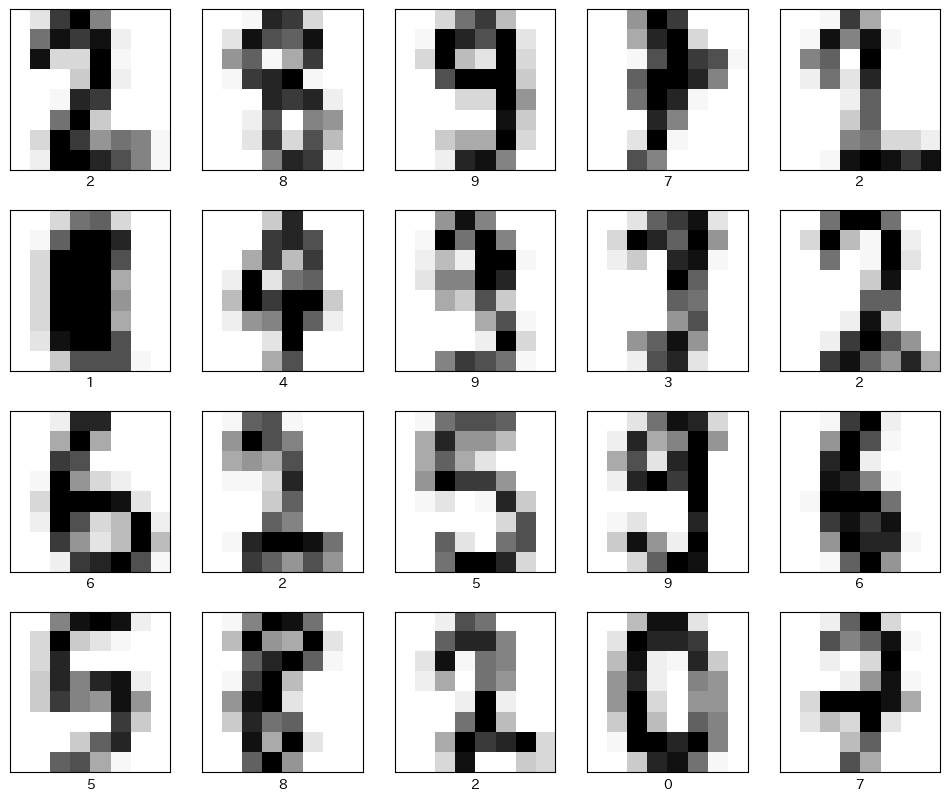

In [4]:
n_rows      = 4
n_columns   = 5
def display_data(x_data, y_data):
  plt.figure(figsize =(12,10))
  rows = n_rows
  columns  = n_columns
  for i in range(rows*columns):
    plt.subplot(rows, columns, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_data[i].reshape(8,8), cmap ="Greys") #reshape(8,8)ーー＞　64個の1次元配列を2次元に変換
    plt.xlabel(y_data[i])
  plt.show()
display_data(x_train, y_train)

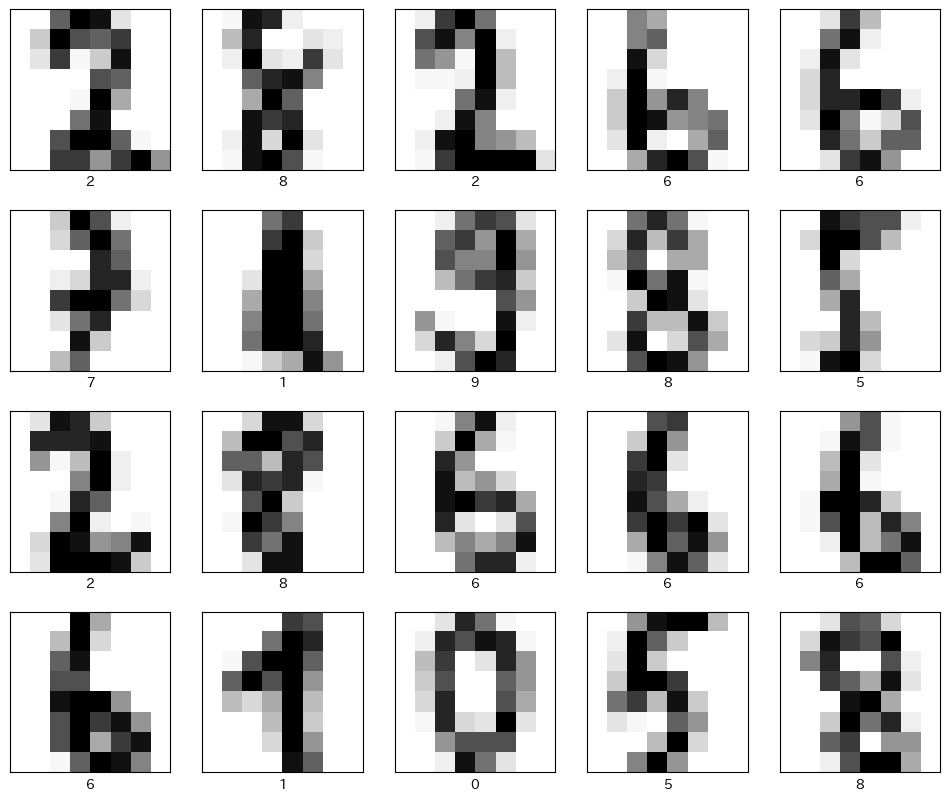

In [5]:
display_data(x_test, y_test)

In [6]:
model = keras.models.Sequential()
# model.add(layers.Flatten(input_shape = (8,8)))  #そのまま入るので不要
model.add(layers.Dense(128, activation="relu",input_dim=64 )   )  #128個の中間層  #1次元の64のデータを入れる
model.add(layers.Dense(10, activation="softmax")     ) #10個(0~9の数字)の出力層
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 9,610
Trainable params: 9,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer="adam",                           #?What is Adam
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/10
43/43 [==============================] - 1s 5ms/step - loss: 2.2715 - accuracy: 0.4343 - val_loss: 2.2372 - val_accuracy: 0.6444
Epoch 2/10
43/43 [==============================] - 0s 2ms/step - loss: 2.1898 - accuracy: 0.6704 - val_loss: 2.1407 - val_accuracy: 0.8089
Epoch 3/10
43/43 [==============================] - 0s 2ms/step - loss: 2.0734 - accuracy: 0.7394 - val_loss: 2.0096 - val_accuracy: 0.8022
Epoch 4/10
43/43 [==============================] - 0s 2ms/step - loss: 1.9183 - accuracy: 0.8508 - val_loss: 1.8479 - val_accuracy: 0.8200
Epoch 5/10
43/43 [==============================] - 0s 2ms/step - loss: 1.7410 - accuracy: 0.8218 - val_loss: 1.6654 - val_accuracy: 0.8489
Epoch 6/10
43/43 [==============================] - 0s 2ms/step - loss: 1.5482 - accuracy: 0.8456 - val_loss: 1.4804 - val_accuracy: 0.8222
Epoch 7/10
43/43 [==============================] - 0s 2ms/step - loss: 1.3620 - accuracy: 0.8426 - val_loss: 1.3057 - val_accuracy: 0.8200
Epoch 8/10
43/43 [==

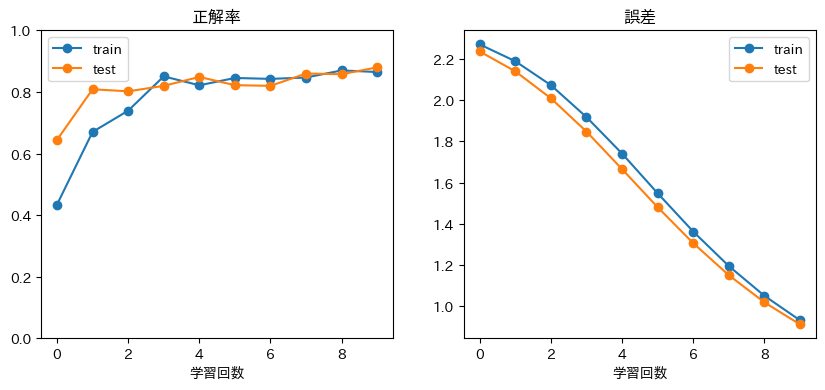

In [8]:
param = [["正解率" , "accuracy" , "val_accuracy"],
          ["誤差","loss" , "val_loss"]]

plt.figure(figsize=(10,4))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.title(param[i][0])      #
  plt.plot(history.history[param[i][1]] , "o-")
  plt.plot(history.history[param[i][2]] , "o-")
  plt.xlabel("学習回数")
  plt.legend(["train","test"] , loc ="best")
  if i==0:
    plt.ylim([0,1])
plt.show()

# Increase the number of layers

In [9]:


model = keras.models.Sequential()
model.add(layers.Dense(1024, activation="relu",input_dim=64 )   )  #128個の中間層  #1次元の64のデータを入れる
model.add(layers.Dense(1024, activation="relu")   )
model.add(layers.Dense(10, activation="softmax")     ) #10個(0~9の数字)の出力層
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              66560     
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 1,126,410
Trainable params: 1,126,410
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer="adam",                           #?What is Adam
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/10
43/43 [==============================] - 2s 32ms/step - loss: 1.7668 - accuracy: 0.6058 - val_loss: 0.9230 - val_accuracy: 0.8444
Epoch 2/10
43/43 [==============================] - 1s 19ms/step - loss: 0.5909 - accuracy: 0.8664 - val_loss: 0.4060 - val_accuracy: 0.8956
Epoch 3/10
43/43 [==============================] - 1s 22ms/step - loss: 0.3286 - accuracy: 0.9139 - val_loss: 0.3032 - val_accuracy: 0.9244
Epoch 4/10
43/43 [==============================] - 1s 15ms/step - loss: 0.2383 - accuracy: 0.9384 - val_loss: 0.2117 - val_accuracy: 0.9311
Epoch 5/10
43/43 [==============================] - 1s 18ms/step - loss: 0.1961 - accuracy: 0.9406 - val_loss: 0.1772 - val_accuracy: 0.9556
Epoch 6/10
43/43 [==============================] - 1s 21ms/step - loss: 0.1494 - accuracy: 0.9629 - val_loss: 0.1640 - val_accuracy: 0.9533
Epoch 7/10
43/43 [==============================] - 1s 18ms/step - loss: 0.1386 - accuracy: 0.9562 - val_loss: 0.1375 - val_accuracy: 0.9556
Epoch 8/10
43

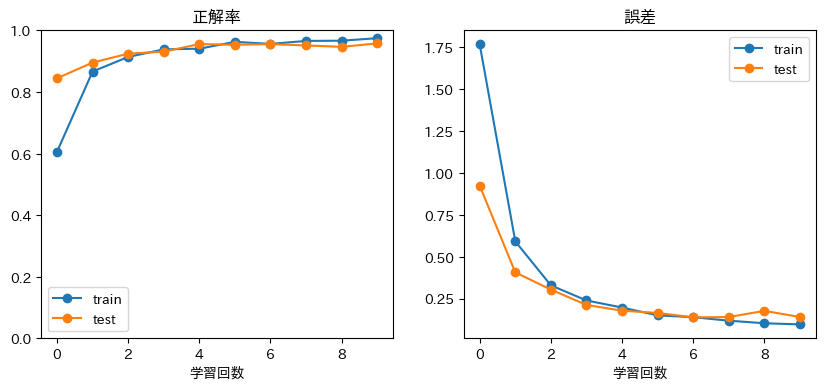

In [11]:
param = [["正解率" , "accuracy" , "val_accuracy"],
          ["誤差","loss" , "val_loss"]]

plt.figure(figsize=(10,4))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.title(param[i][0])      #
  plt.plot(history.history[param[i][1]] , "o-")
  plt.plot(history.history[param[i][2]] , "o-")
  plt.xlabel("学習回数")
  plt.legend(["train","test"] , loc ="best")
  if i==0:
    plt.ylim([0,1])
plt.show()

In [19]:
pre = model.predict(x_test)
pre[0]

15/15 [==============================] - 0s 3ms/step


array([3.3740626e-08, 2.6228396e-05, 9.9977875e-01, 1.4897439e-04,
       4.9821658e-09, 1.2803866e-07, 1.5417788e-09, 9.3060262e-06,
       3.5538462e-05, 1.0094936e-06], dtype=float32)

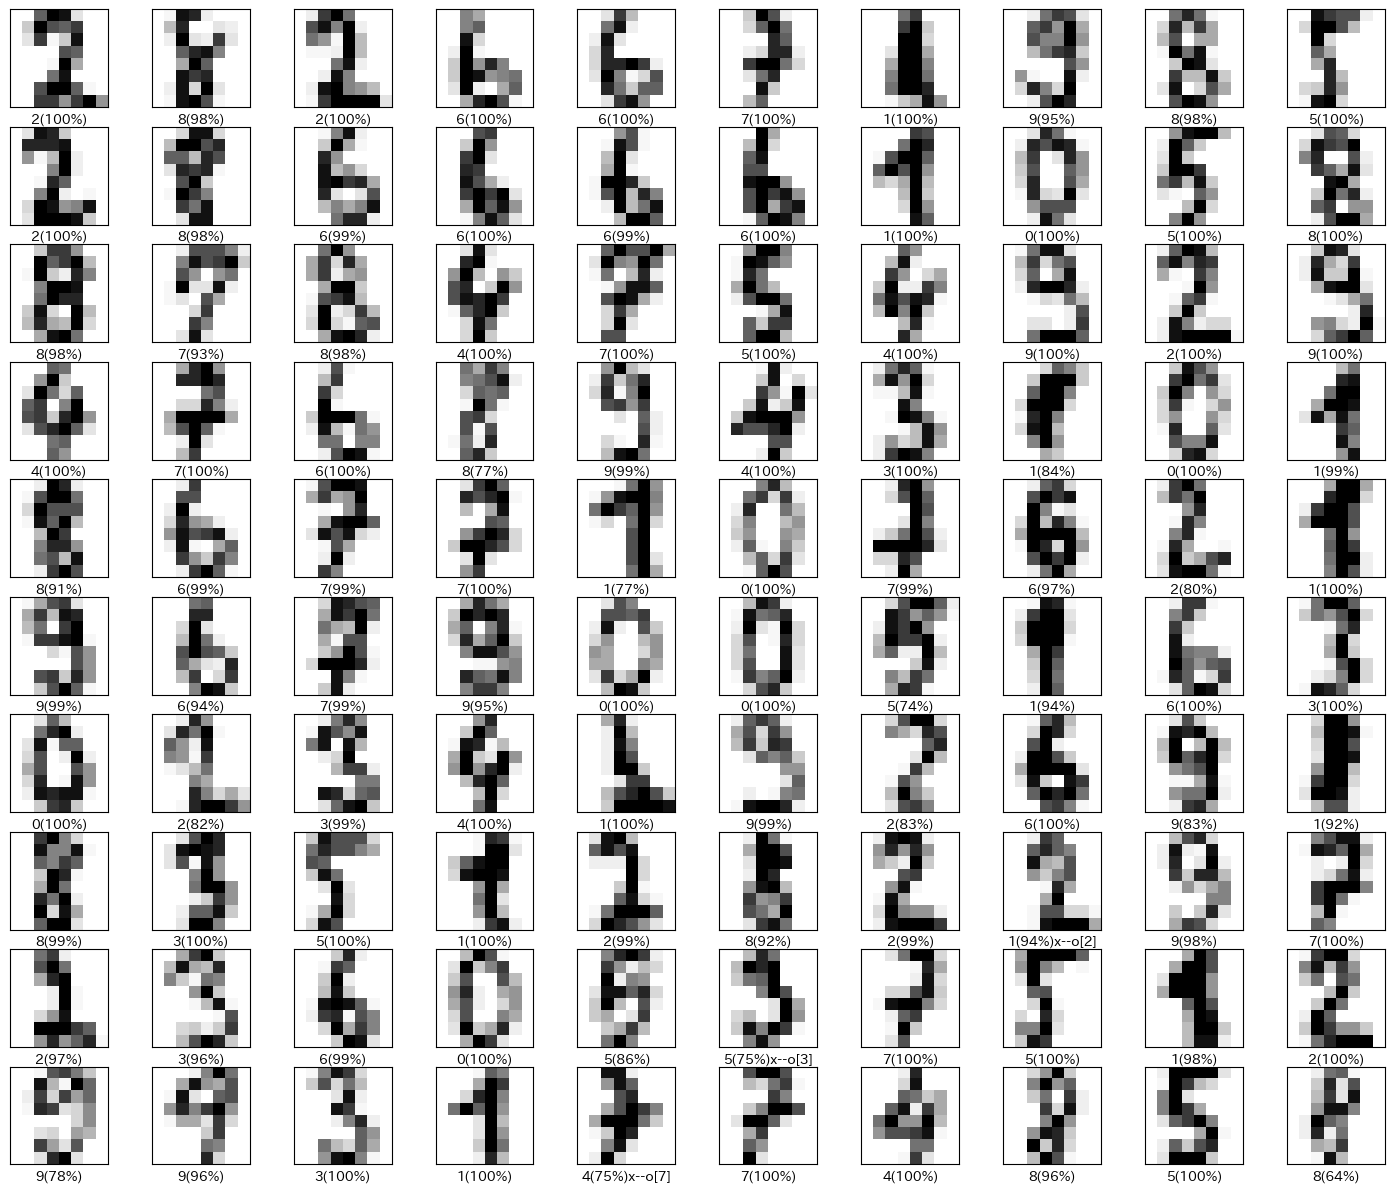

In [29]:
n_rows      =  10
n_columns   = 10
plt.figure(figsize=(18,15))
for i in range(n_rows*n_columns):
  plt.subplot(n_rows, n_columns, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i].reshape(8,8), cmap ="Greys")    #入力 x_testが(64,)なので、imshow のためにx_test[i]の後にreshape(8,8)が必要
  #
  index= np.argmax(pre[i])
  pct  = pre[i][index]
  ans  = ""
  if index != y_test[i]:
    ans = "x--o["+str(y_test[i])+"]"
  lbl = f"{index}({pct:.0%}){ans}"
  plt.xlabel(lbl)
plt.show()

In [21]:
name = "Alice"
age = 25
formatted_string = f"My name is {name} and I am {age} years old."
print(formatted_string)  # Output: My name is Alice and I am 25 years old.


My name is Alice and I am 25 years old.


In [22]:
# This is not a valid way to use f-strings or square brackets
invalid_string = f"[]"
print(invalid_string)  # Output: []


[]


In [24]:
abc = 123
result1 = f"{abc}"      # Result: "123"
result2 = f"[+\"abc\"]"  # Result: "[+\"abc\"]"

print(result1)
print(result2)

123
[+"abc"]
